In [1]:
import pandas as pd
import numpy as np
import cv2
import json
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


In [2]:
def create_masks_from_via_json(json_path, images_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    with open(json_path, 'r') as f:
        via_data = json.load(f)
    
    for image_id, image_data in via_data.items():
        filename = image_data['filename']
        regions = image_data['regions']
        
        # Get image dimensions
        img_path = os.path.join(images_dir, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        height, width = img.shape[:2]
        mask = np.zeros((height, width), dtype=np.uint8)
        
        for region in regions:
            shape_attributes = region['shape_attributes']
            
            if shape_attributes['name'] == 'polygon':
                points_x = shape_attributes['all_points_x']
                points_y = shape_attributes['all_points_y']
                points = np.array(list(zip(points_x, points_y)), dtype=np.int32)
                cv2.fillPoly(mask, [points], 255)
            
            # Handle other shapes as needed
        
        mask_filename = os.path.splitext(filename)[0] + "_mask.png"
        mask_path = os.path.join(output_dir, mask_filename)
        cv2.imwrite(mask_path, mask)

In [ ]:

# Replace these with your actual paths
json_path = "16_06_2025_18_07PM_json.json"
images_dir = "C:\\Users\\tania\\PythonProjects\\keylife-ng-pv\\ml_project_2\\data\\u-net-data\\training"#-nolabel" for empty images with no greenery
output_dir = "C:\\Users\\tania\\PythonProjects\\keylife-ng-pv\\ml_project_2\\data\\u-net-data\\training-labels"

# Choose one method
create_masks_from_via_json(json_path, images_dir, output_dir)
# Or
# create_masks_with_pil(csv_path, images_dir, output_dir)

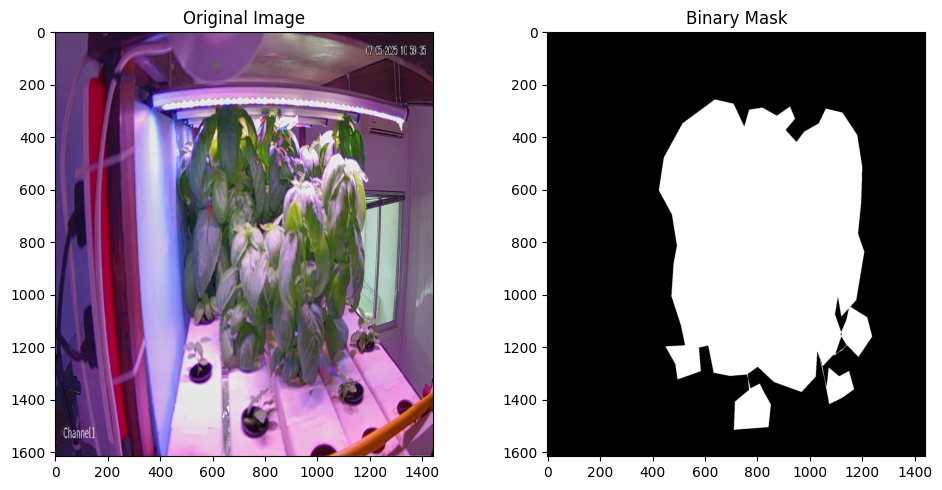

In [9]:

# Optional: Display a sample result
sample_mask = os.listdir(output_dir)[0]  # Get first mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sample_img = cv2.imread(os.path.join(images_dir, sample_mask.replace("_mask.png", ".jpg")))
if sample_img is not None:
    sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    plt.imshow(sample_img)
    plt.title("Original Image")

plt.subplot(1, 2, 2)
sample_mask_img = cv2.imread(os.path.join(output_dir, sample_mask), cv2.IMREAD_GRAYSCALE)
if sample_mask_img is not None:
    plt.imshow(sample_mask_img, cmap='gray')
    plt.title("Binary Mask")

plt.tight_layout()
plt.show()